In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'dataset_modelling.csv'
data = pd.read_csv(file_path)

In [3]:
# Prepare data
text = data['Review'].astype(str)
labels = data['Label']

In [4]:
# Convert labels to categorical format
label_dict = {'positive': 0, 'negative': 1, 'neutral': 2} 
labels = labels.map(label_dict)

In [5]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42)

In [6]:
# Text vectorization using Bag-of-Words (CountVectorizer)
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [7]:
# Train the linear regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Mapping numerical labels to their corresponding sentiment classes
sentiment_map = {0: 'positive', 1: 'negative', 2: 'neutral'}
y_test_sentiment = [sentiment_map[label] for label in y_test]
y_pred_sentiment = [sentiment_map[label] for label in y_pred]

In [9]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test_sentiment, y_pred_sentiment))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test_sentiment, y_pred_sentiment)
print(f'Accuracy: {accuracy * 100:.2f}%')

Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.93      0.95       194
     neutral       0.88      0.96      0.92       135
    positive       1.00      1.00      1.00      2847

    accuracy                           0.99      3176
   macro avg       0.95      0.96      0.95      3176
weighted avg       0.99      0.99      0.99      3176

Accuracy: 99.06%


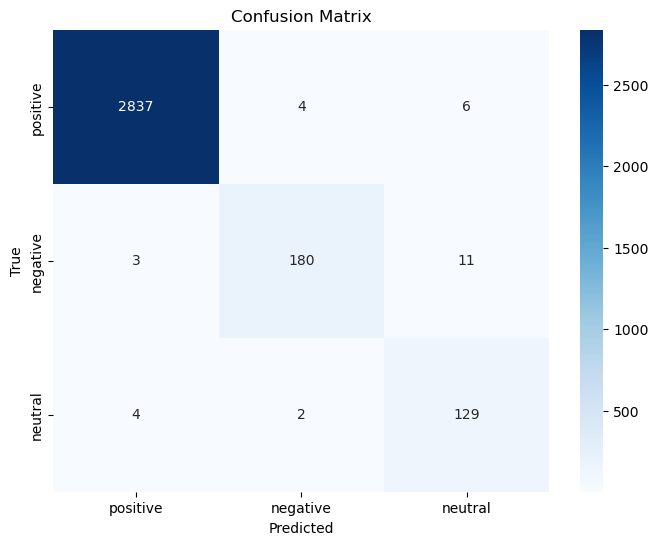

In [10]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()